# (4주차) 3월28일 -- draft

- toc:true
- branch: master
- badges: true
- comments: true
- author : 최규빈
- editor : 이강철
- published : true
- hide : false

### 강의영상 

### 미분 

#### tf.GradientTape() 사용방법

`-` 예제9: 카페예제로 돌아오자. (1주차 강의)

`-` 자료 생성

In [98]:
#collapse-hide
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [99]:
tnp.experimental_enable_numpy_behavior()

In [100]:
x=tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
x

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])>

In [101]:
tnp.random.seed(43052) 
y= 10.2+ x*2.2 + tnp.random.randn(10) 
y

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([54.98269924, 60.27348365, 61.27621687, 60.53495888, 62.9770905 ,
       66.32168996, 66.87781372, 71.0050025 , 72.63837337, 77.11143943])>

### 중간고사 기출문제

`-`  loss 정의

In [102]:
beta0= tf.Variable(9.0) 
beta1= tf.Variable(2.0)  

In [103]:
with tf.GradientTape(persistent=True) as tape :
    loss = sum((y-beta0-beta1*x)**2)

In [104]:
tape.gradient(loss,beta0),tape.gradient(loss,beta1)

(<tf.Tensor: shape=(), dtype=float32, numpy=-127.597534>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-3214.2532>)

`-` 계산이 맞는지  확인

In [105]:
X= tnp.array([1]*10+ [20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]).reshape(2,10).T
X

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]])>

In [106]:
beta_true = tnp.array([[10.2],[2.2]])
beta_true

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[10.2],
       [ 2.2]])>

In [107]:
tnp.random.seed(43052) 
y= X@beta_true + tnp.random.randn(10).reshape(10,1)
y

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[54.98269924],
       [60.27348365],
       [61.27621687],
       [60.53495888],
       [62.9770905 ],
       [66.32168996],
       [66.87781372],
       [71.0050025 ],
       [72.63837337],
       [77.11143943]])>

In [108]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta)
    yhat = X@beta 
    loss=(y-yhat).T @ (y-yhat) 

`-` 미분

In [109]:
tape.gradient(loss,beta) # 텐서플로우가 계산한 미분값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -127.59753624],
       [-3214.25306574]])>

`-` 이론적인 값과 동일한지 확인

$$loss = -2 X^{\prime}y + 2X^{\prime}X\beta$$

In [94]:
-2 * X.T @ y + 2* X.T @ X @ beta # 이론적인 값 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -127.59753624],
       [-3214.25306574]])>

`-` 베타 추정치 계산

In [110]:
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[12.10040012],
       [ 2.13112662]])>

`-` 예제11: 위의 예제에서 이론적인 $\boldsymbol{\beta}$의 최적값을 찾아보고 (즉 $\boldsymbol{\hat\beta}$을 찾고) 그 지점에서 loss의 미분값(=접선의 기울기)를 구하라. 결과가 $\bf{0}$인지 확인하라. (단 ${\bf 0}$은 길이가 2이고 각 원소가 0인 벡터)

* loss 값을 보아 제대로 추정되지 않았음 

$\beta$의 최적값은 $(X^{\prime}X)^{-1}X^{\prime}y$

In [112]:
beta_optimal = tf.linalg.inv(X.T @ X) @ X.T @ y
beta_optimal

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[12.10040012],
       [ 2.13112662]])>

`beta_optimal`을 미분했을 때 0이 나와야 실제 베타에 대한 최적의 추정치가 구해진거임

In [114]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta_optimal)
    yhat = X@beta_optimal
    loss=(y-yhat).T @ (y-yhat) 

In [118]:
tape.gradient(loss,beta_optimal) # 텐서플로우가 계산한 미분값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-5.27222710e-12],
       [-1.33283323e-10]])>

`-` 베타의 실제값과 베타 옵티말을 넣으면 어떨까?

In [119]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta_true)
    yhat = X@beta_true
    loss=(y-yhat).T @ (y-yhat) 

In [120]:
tape.gradient(loss,beta_true) # 텐서플로우가 계산한 미분값

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -3.55753624],
       [-76.87306574]])>

* 옵티말보다 loss가 최적보단 크다 그러나 표본의 수가 커질 경우 최적치와 실제가 점점 비슷해진다 


* 결국 `beta_true` $\approx$ `beta_optimal` 이라고 할 수 있다. 

## 경사하강법 

`-` $loss = (\frac {1}{2}\beta-1)^2$ 을 최소화 하는 $\beta$ 를 구해보자

`-` 당연히  $\beta=2$일 떼 최솟값을 가질 것이다

`-` 이것을 컴퓨터로 직접 구해보자

### 최적화문제 

### 방법1: grid search

`-` 단순히 베타를 개많이 만들고 `loss`를 최소화하는 베타를 찾자 

#### 알고리즘 

#### 구현코드 

In [132]:
beta = tnp.linspace(-10,10,1000) 
#beta

In [135]:
loss = (1/2*beta-1)**2 

In [136]:
tnp.argmin(loss)

<tf.Tensor: shape=(), dtype=int64, numpy=599>

* grid search로 알아봤을 때 최솟값이 2에 근사하게 나온다 

In [137]:
beta[599]

<tf.Tensor: shape=(), dtype=float64, numpy=1.9919919919919913>

#### 그리드서치의 문제점 

`-` 좀 정확하진 않지만 표본의 수를 늘리면 2의 근접한 값을 찾는다. 

`-` 비판1: [-10,10]이외에 해가 존재하면? 즉 범위 밖에 존재할 수 가 있음
- 이 예제의 경우는 운좋게 [-10,10]에서 해가 존재했음
- 하지만 임의의 고정된 $x,y$에 대하여 $loss(\beta)=(x\beta-y)^2$ 의 형태의 해가 항상 [-10,10]에서 존재한다는 보장은 없음
- 해결책: 더 넓게 많은 범위를 탐색하자? $\to$ but, 무한대의 범위에서 할 수 없음

`-` 비판2: 위 해결책은 효율적이지 않음
- 알고리즘을 요약하면 결국 -10부터 10까지 작은 간격으로 조금씩 이동하며 loss를 조사하는 것이 grid search의 아이디어 
- $\to$ 생각해보니까 $\beta=2$인 순간 $loss=(\frac{1}{2}\beta-1)^2=0$이 되어서 이것보다 작은 최소값은 존재하지 않는다(제곱은 항상 양수이어야 하므로)
- $\to$ 따라서 $\beta=2$ 이후로는 탐색할 필요가 없다 

### 방법2: gradient descent

(1) 임의의 초기값을 선정하고 $loss$를 계산한다 (초깃값 셋팅)

* $\beta = -5 \to loss(-5) = (-5/2-1)^2 = 12.55$

In [138]:
(-5/2-1)**2

12.25

(2) 임의의 초기값에서 좌우로 약간씩 이동해보고 $loss$를 계한한다. (미분에서 최솟값을 찾는 과정)

$\to \beta = -5.01,\, \beta = -4.99$

In [139]:
(-5.01 /2 -1)**2,(-4.99 /2 -1)**2

(12.285025, 12.215025)

(3) (2)의 결과를 보고 어느쪽으로 이동하는 것이 유리한지 따져본다. 그 후 **유리한 방향으로** 이동한다.

In [140]:
import matplotlib.pyplot as plt

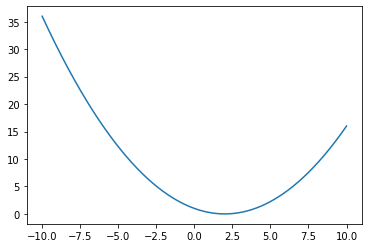

In [141]:
plt.plot(beta,loss)

`-` (2) - (3)의 과정은 $\beta = -5$ 미분계수를 구한 후 미분계수가 양수이면 왼쪽으로 움직이고 음수이면 오른쪽으로 움직인다고 해석가능

(4) `(2) ~ (3)` 과정을 반복 후, **어느쪽으로 가도 유리한 지점이 없다면 알고리즘을 멈춘다**

#### 알고리즘 분석 

`-` 알고리즘이 멈추는 지점은 $\beta=2$이다. 왜냐하면 이경우 왼쪽으로 가도, 오른쪽으로 가도 현재 손실함수값보다 크기 때문.

#### 왼쪽/오른쪽중에 어디로 갈지 어떻게 판단하는 과정을 수식화?

- 오른쪽으로 0.01간다 $\to$ 미분계수가 음수일 때
- 왼쪽으로 0.01간다 $\to$ 미분계수가 양수일 때

`-` 그렇다면

$\beta_{new} =\beta_{old} + 0.01 \to \frac{d\,loss}{d\,\beta_{old}}$ 가 음수 일때

$\beta_{new} =\beta_{old} - 0.01 \to \frac{d\,loss}{d\,\beta_{old}}$ 가 양수 일때

#### 혹시 알고리즘을 좀 개선할수 있을까?

`-` 동일하게 0.01씩 이동하는게 맞는지 의문

In [145]:
import numpy as np

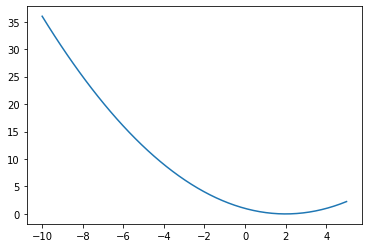

In [146]:
_beta = np.linspace(-10,5)
plt.plot(_beta,(_beta/2-1)**2)

`-` $\beta=-10$ 일 경우의 접선의 기울기? $\beta=-4$ 일때 접선의 기울기?

`-` $\beta= -10 \to 기울기는 -6$

`-` $\beta= -4 \to 기울기는 -3$

* 위 같은 경우 $\beta = -10$ 에서 0.01만큼 이동했다면 $\beta=-4$ 에서 0.005만큼 이동해야함

* 즉, 떨어진 만큼 비례해서 조금 더 자신있게 가자는 거임

$$\beta_{new}= \beta_{old} \pm \alpha \left[\frac {∂}{\,∂\beta}loss(\beta)\right],\quad \alpha>0$$

#### 구현코드 

#### 학습률 

##### [시각화 코드 예비학습] 